In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telcochurnpredict/Telco-Customer-Churn.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df=pd.read_csv("/kaggle/input/telcochurnpredict/Telco-Customer-Churn.csv")

In [4]:
df['TotalCharges'].head(50)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
20      39.65
21     202.25
22      20.15
23     3505.1
24     2970.3
25     1530.6
26    4749.15
27       30.2
28    6369.45
29     1093.1
30    6766.95
31     181.65
32    1874.45
33       20.2
34      45.25
35     7251.7
36      316.9
37     3548.3
38    3549.25
39     1105.4
40      475.7
41    4872.35
42     418.25
43    4861.45
44     981.45
45     3906.7
46         97
47     144.15
48     4217.8
49     4254.1
Name: TotalCharges, dtype: object

In [5]:
df.shape
df.describe().T

for i in df.columns:
    print(f"Sütun adı: {i}\n"
          f"Nunique Değer Sayısı: {df[i].nunique()}")
df.info()

Sütun adı: customerID
Nunique Değer Sayısı: 7043
Sütun adı: gender
Nunique Değer Sayısı: 2
Sütun adı: SeniorCitizen
Nunique Değer Sayısı: 2
Sütun adı: Partner
Nunique Değer Sayısı: 2
Sütun adı: Dependents
Nunique Değer Sayısı: 2
Sütun adı: tenure
Nunique Değer Sayısı: 73
Sütun adı: PhoneService
Nunique Değer Sayısı: 2
Sütun adı: MultipleLines
Nunique Değer Sayısı: 3
Sütun adı: InternetService
Nunique Değer Sayısı: 3
Sütun adı: OnlineSecurity
Nunique Değer Sayısı: 3
Sütun adı: OnlineBackup
Nunique Değer Sayısı: 3
Sütun adı: DeviceProtection
Nunique Değer Sayısı: 3
Sütun adı: TechSupport
Nunique Değer Sayısı: 3
Sütun adı: StreamingTV
Nunique Değer Sayısı: 3
Sütun adı: StreamingMovies
Nunique Değer Sayısı: 3
Sütun adı: Contract
Nunique Değer Sayısı: 3
Sütun adı: PaperlessBilling
Nunique Değer Sayısı: 2
Sütun adı: PaymentMethod
Nunique Değer Sayısı: 4
Sütun adı: MonthlyCharges
Nunique Değer Sayısı: 1585
Sütun adı: TotalCharges
Nunique Değer Sayısı: 6531
Sütun adı: Churn
Nunique Değer Sayıs

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "object" or dataframe[col].dtypes.name == "category"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "object" and dataframe[col].dtypes.name != "category"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   (dataframe[col].dtypes == "object" or dataframe[col].dtypes.name == "category")]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "object" and dataframe[col].dtypes.name != "category"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols

cat_cols, num_cols = grab_col_names(df)
cat_cols
num_cols

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


['tenure', 'MonthlyCharges']

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Tip hatası olan değişkenler.
df["SeniorCitizen"]=df["SeniorCitizen"].astype("object")  ## Yes ve no değişkenlerinden oluşuyor.

In [9]:
df['TotalCharges'] = df['TotalCharges'].str.strip()  #Boşluk değerler gözüküyor.Boşlukları siliyoruz.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])  # Sayısal değerler mevcut. İnt veya float türünde olması gerekir.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


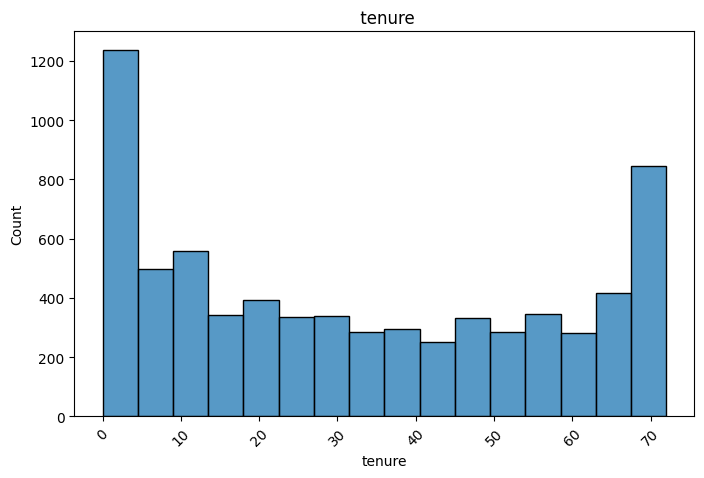

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


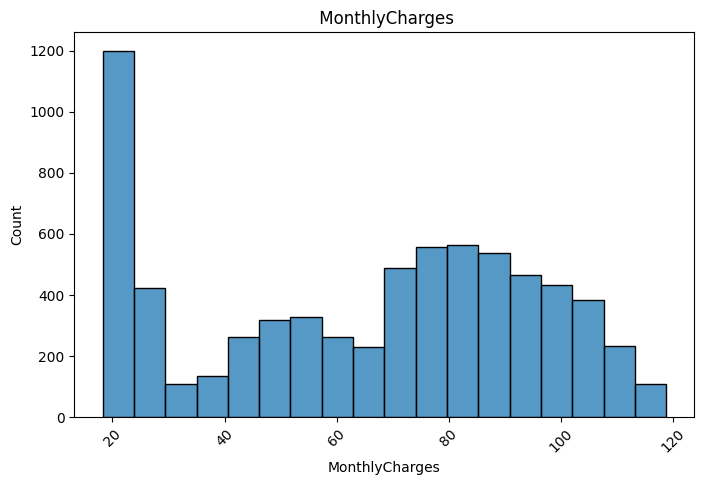

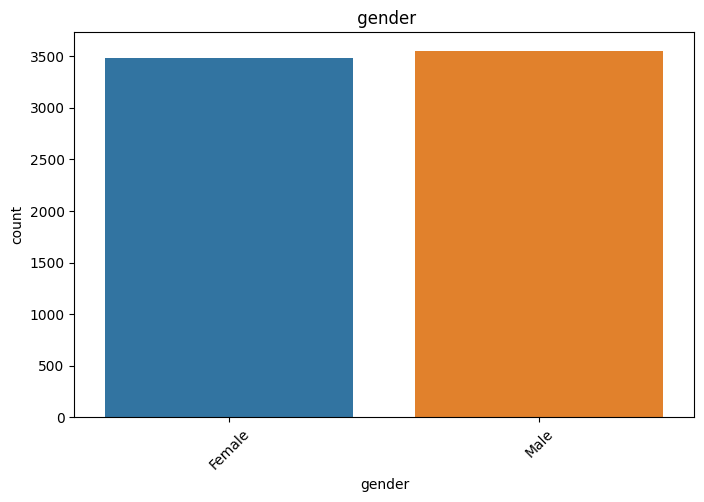

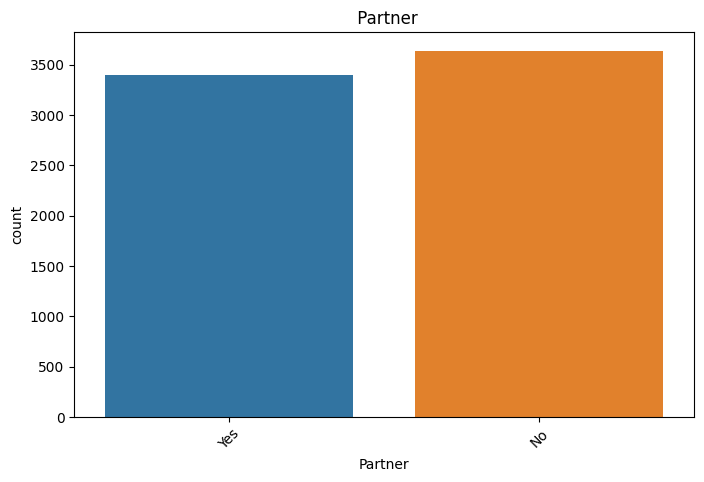

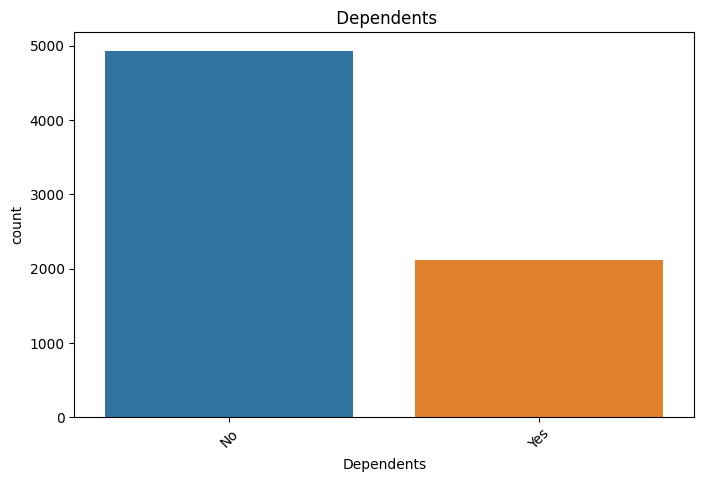

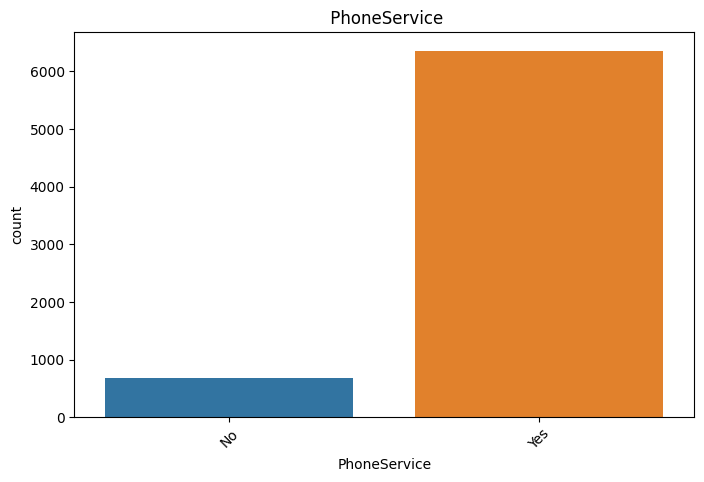

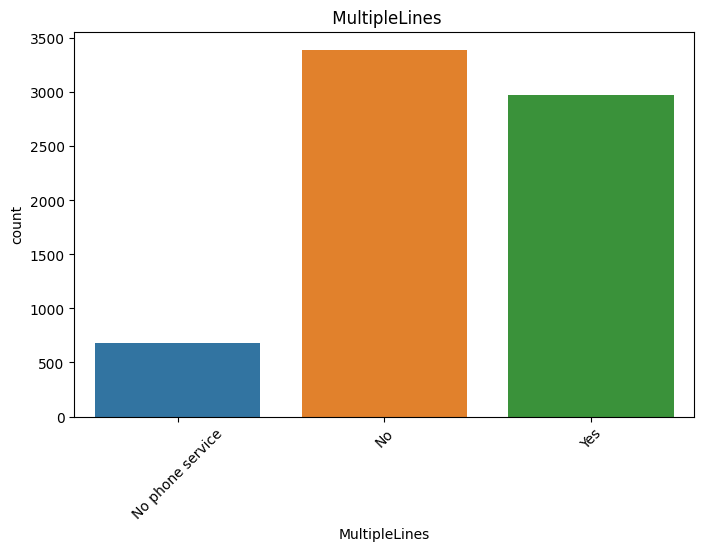

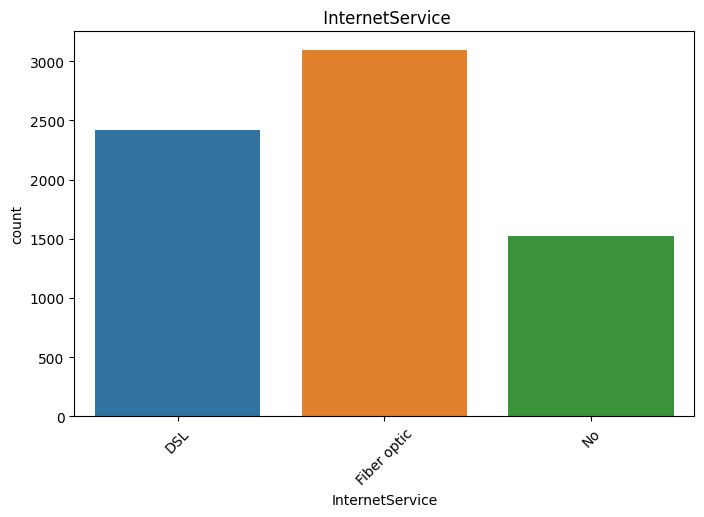

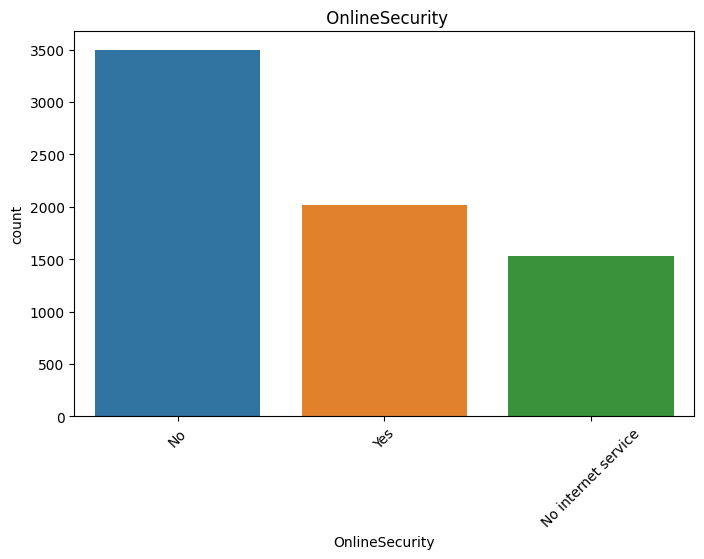

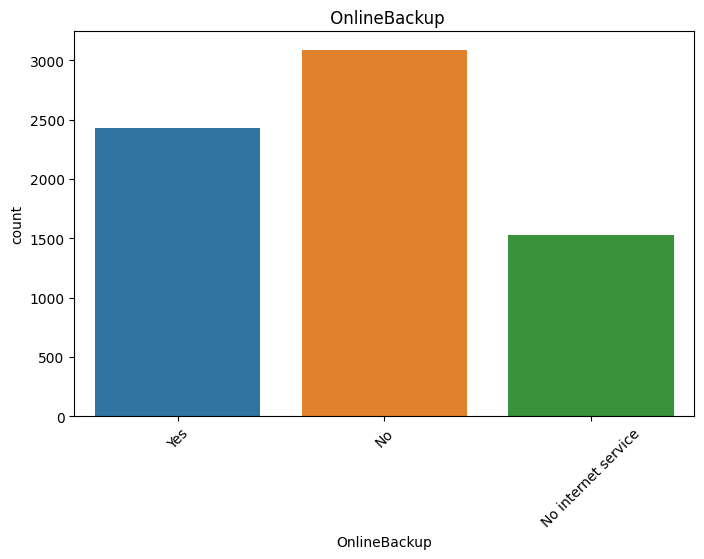

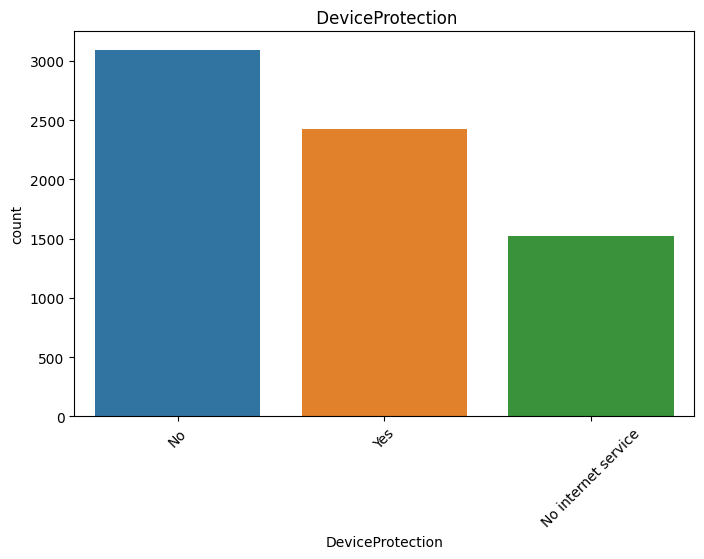

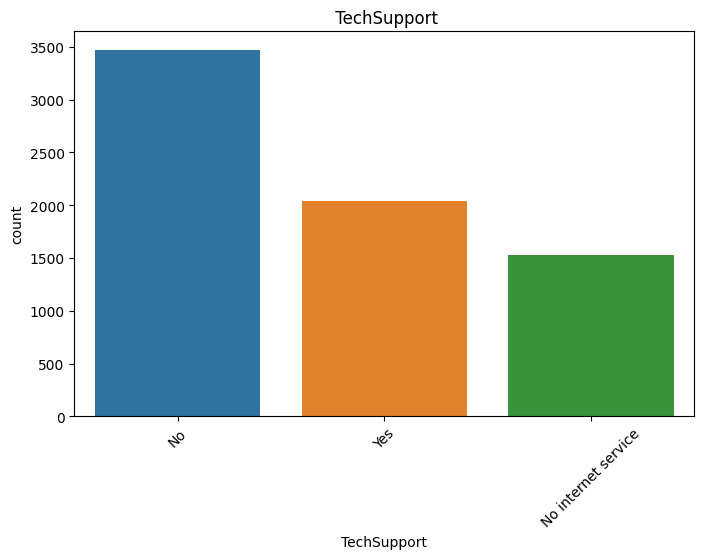

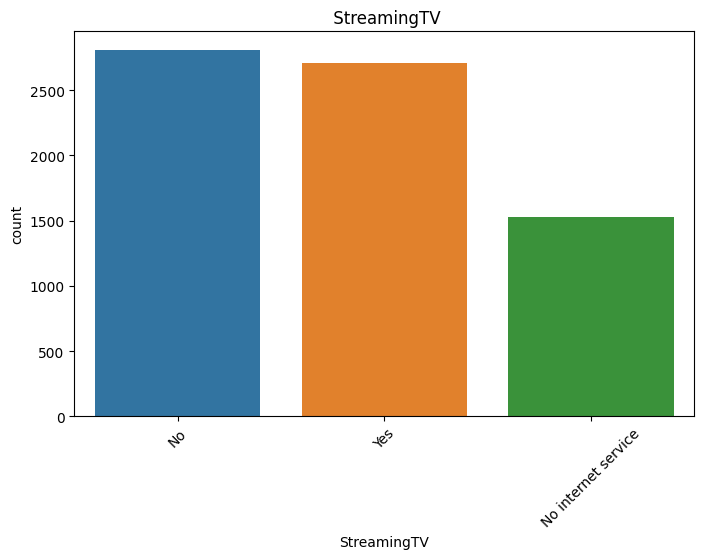

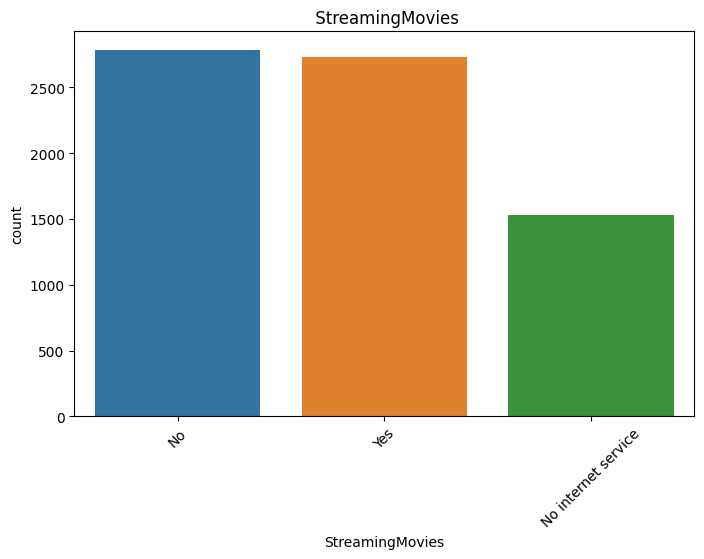

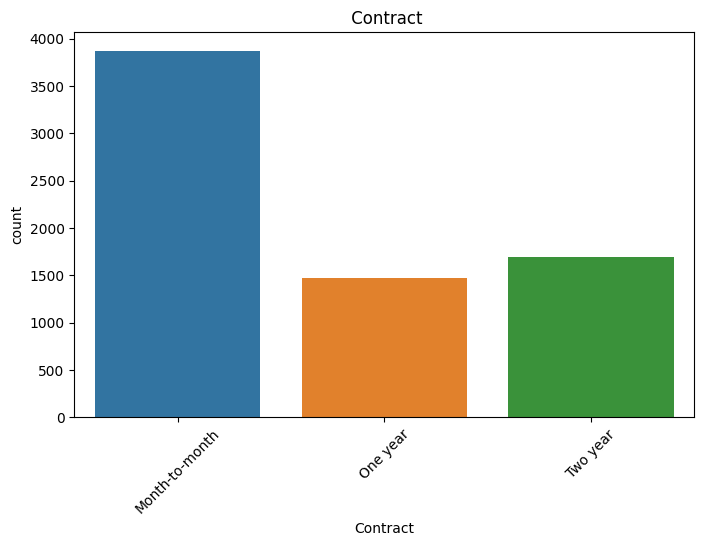

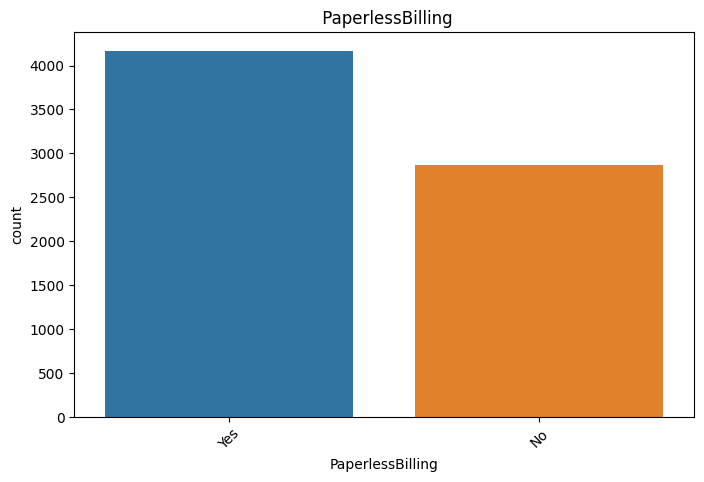

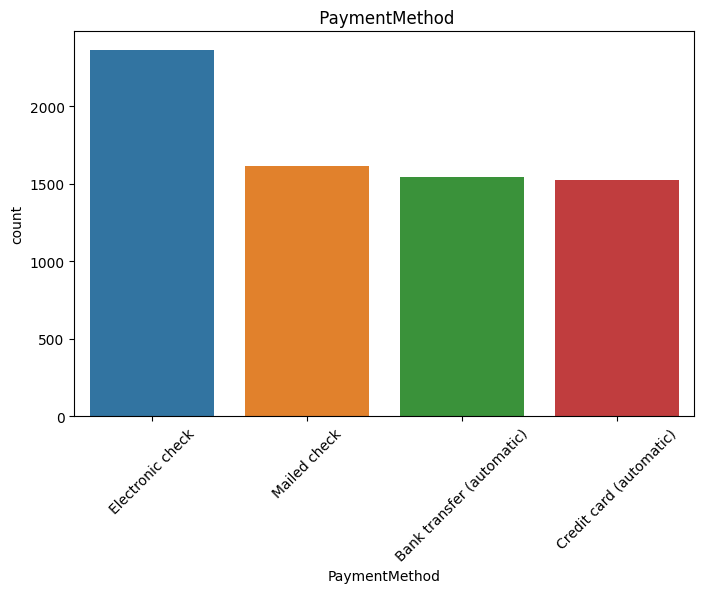

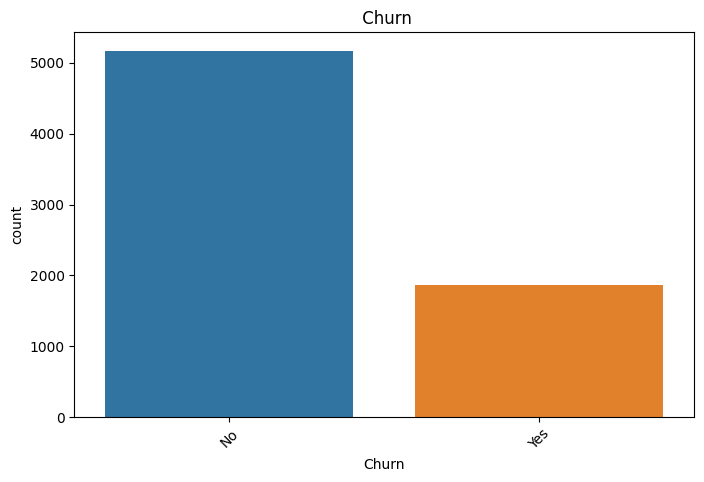

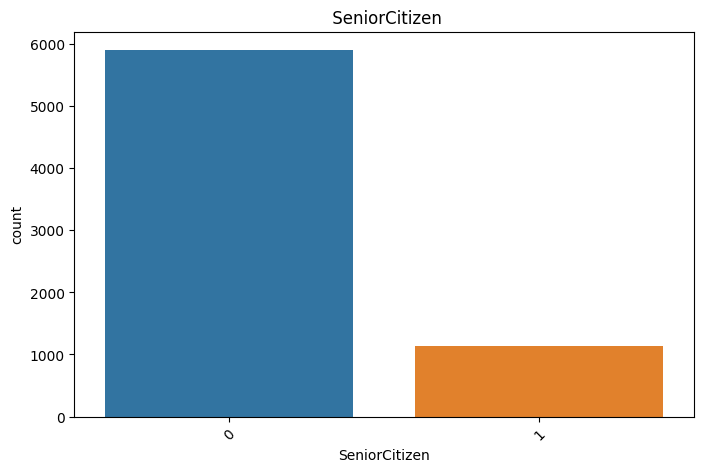

In [11]:


## Numerik ve Kategorik Değişkenlerin veri içindeki dağılımını gözlemleyiniz.


for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(x=df[col])
    plt.title(f' {col}')
    plt.xticks(rotation=45)
    plt.show()


for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col])
    plt.title(f' {col}')
    plt.xticks(rotation=45)
    plt.show()


In [12]:

### Kategorik değişkenler ile hedef değişken incelemesini yapınız ###

le=LabelEncoder()
df["Churn"]=le.fit_transform(df["Churn"])  # Groupby yapacağımız için yes ve no değişkenlerini 0 ve 1 değerlerine dönüştürüyoruz. Replace fonksiyonu da kullanılabilir.
df.head()

def target(dataframe, target, cat_col):
    print(pd.DataFrame({"Target_Mean": dataframe.groupby(cat_col)[target].mean(),
                        "Count": dataframe[cat_col].value_counts()}),end="\n ###############\n")

for col in cat_cols:
    target(df, "Churn", col)


        Target_Mean  Count
gender                    
Female         0.27   3488
Male           0.26   3555
 ###############
         Target_Mean  Count
Partner                    
No              0.33   3641
Yes             0.20   3402
 ###############
            Target_Mean  Count
Dependents                    
No                 0.31   4933
Yes                0.15   2110
 ###############
              Target_Mean  Count
PhoneService                    
No                   0.25    682
Yes                  0.27   6361
 ###############
                  Target_Mean  Count
MultipleLines                       
No                       0.25   3390
No phone service         0.25    682
Yes                      0.29   2971
 ###############
                 Target_Mean  Count
InternetService                    
DSL                     0.19   2421
Fiber optic             0.42   3096
No                      0.07   1526
 ###############
                     Target_Mean  Count
OnlineSecurity   

In [13]:

### Aykırı Gözlem Var Mı İnceleyiniz ###

def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75): ## Alt ve üst eşik değeri hesaplamak için kullanırız.
    quartile1=dataframe[col_name].quantile(q1) ## Her sütunun çeyreklik değerini belirler.
    quartile3=dataframe[col_name].quantile(q3)
    iqr=quartile3 - quartile1  ## Çeyrekler arası farkı gösterir.
    up_limit=quartile3 + 1.5*iqr  # Üt limiti belirleriz.Bu değerin üstündekiler aykırı değerler.
    low_limit= quartile1 - 1.5 *iqr  #Alt limiti belirleriz. Bu değerin altındaki değerler aykırı değerlerdir.
    return low_limit,up_limit

def check_outlier(dataframe,col_name): #Aykırı değer içerip içermediğini kontrol eder.
    low_limit,up_limit=outlier_thresholds(dataframe,col_name) # Alt ve üst limit değerini alır.
    if dataframe[(dataframe[col_name] >up_limit) | (dataframe[col_name]<low_limit)].any(axis=None):  # ALt limitin altında veya üst limitin üstünde olan değer var mı ona bakar.
        #Eğer var ise true döndürür yok ise false döndürür.
        return True
    else:
        return False

for col in num_cols:
    print(col,":",check_outlier(df,col))


tenure : False
MonthlyCharges : False


In [14]:
###Eksik Gözlem Var Mı İnceleyeniz.

from prettytable import PrettyTable

# PrettyTable ile tablo oluşturma
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])

# Her sütun için eksik değerleri kontrol etme
for col in df.columns:
    # NaN değerlerini ve '?' sembolüyle işaretlenen eksik verileri sayma
    missing_count = df[col].isna().sum() + (df[col] == '?').sum()

    # Eksik değer yüzdesi
    missing_percentage = (missing_count / len(df)) * 100

    # Tabloya satır ekleme
    t.add_row([col, missing_count, f"{missing_percentage:.2f}%"])

print(t)


+------------------+----------------+--------------------+
|   Column Name    | Missing Values | Missing Percentage |
+------------------+----------------+--------------------+
|    customerID    |       0        |       0.00%        |
|      gender      |       0        |       0.00%        |
|  SeniorCitizen   |       0        |       0.00%        |
|     Partner      |       0        |       0.00%        |
|    Dependents    |       0        |       0.00%        |
|      tenure      |       0        |       0.00%        |
|   PhoneService   |       0        |       0.00%        |
|  MultipleLines   |       0        |       0.00%        |
| InternetService  |       0        |       0.00%        |
|  OnlineSecurity  |       0        |       0.00%        |
|   OnlineBackup   |       0        |       0.00%        |
| DeviceProtection |       0        |       0.00%        |
|   TechSupport    |       0        |       0.00%        |
|   StreamingTV    |       0        |       0.00%       

In [15]:

#####GÖREV-2 Feature Engineering ########

### Eksik ve Aykırı Değerler İçin Gerekli İşlemleri Yapınız. ##
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)
df.isnull().sum()


/tmp/ipykernel_17/2827805471.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
### Yeni Sütunlar Oluşturunuz. ###


for i in df["tenure"]:
    if i==0:
        df["New_Avg_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)
    else:
        df["New_Avg_Charges"] = df["TotalCharges"] / (df["tenure"])

df[["MonthlyCharges","New_Avg_Charges"]].head(10)

df["tenure"].value_counts()

bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
labels = ["0-1 Year", "1-2 Year", "2-3 Year", "3-4 Year", "4-5 Year", "5-6 Year", "6+ Years"]

df['Tenure_Year'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)
df.head()

cat_cols, num_cols = grab_col_names(df)

Observations: 7043
Variables: 23
cat_cols: 18
num_cols: 4
cat_but_car: 1
num_but_cat: 1


In [18]:
df2=df.copy()

In [19]:
###Encoding İşlemleri ###
def label_encoder(dataframe, binary_cols):
    labelencoder = LabelEncoder()
    for binary_col in binary_cols:
        dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df2.columns if df2[col].dtype != [[int, float]]
               and df2[col].nunique() == 2]
label_encoder(df2,binary_cols)
df2.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Avg_Charges,Tenure_Year
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,29.85,0-1 Year
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,No,No,One year,0,Mailed check,56.95,1889.50,0,55.57,2-3 Year
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,54.08,0-1 Year
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,40.91,3-4 Year
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,75.83,0-1 Year


In [20]:

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cols = [col for col in df2.columns if 10 >= df2[col].nunique() > 2]

df2 = one_hot_encoder(df2, cols)

df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Year_1-2 Year,Tenure_Year_2-3 Year,Tenure_Year_3-4 Year,Tenure_Year_4-5 Year,Tenure_Year_5-6 Year,Tenure_Year_6+ Years
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,True,False,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,True,False,True,False,False,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,True,False,False,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,False,False,False,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,True,False,False,False,False,False,False,False


In [21]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
mms = MinMaxScaler()
df2[num_cols]=mms.fit_transform(df2[num_cols])
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Year_1-2 Year,Tenure_Year_2-3 Year,Tenure_Year_3-4 Year,Tenure_Year_4-5 Year,Tenure_Year_5-6 Year,Tenure_Year_6+ Years
0,7590-VHVEG,0,0,1,0,0.01,0,1,0.12,0.00,...,False,False,True,False,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,0.47,1,0,0.39,0.22,...,False,False,False,True,False,True,False,False,False,False
2,3668-QPYBK,1,0,0,0,0.03,1,1,0.35,0.01,...,False,False,False,True,False,False,False,False,False,False
3,7795-CFOCW,1,0,0,0,0.62,0,0,0.24,0.21,...,False,False,False,False,False,False,True,False,False,False
4,9237-HQITU,0,0,0,0,0.03,1,1,0.52,0.02,...,False,False,True,False,False,False,False,False,False,False


In [22]:
df2=df2.drop(columns="customerID",axis=1)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Year_1-2 Year,Tenure_Year_2-3 Year,Tenure_Year_3-4 Year,Tenure_Year_4-5 Year,Tenure_Year_5-6 Year,Tenure_Year_6+ Years
0,0,0,1,0,0.01,0,1,0.12,0.00,0,...,False,False,True,False,False,False,False,False,False,False
1,1,0,0,0,0.47,1,0,0.39,0.22,0,...,False,False,False,True,False,True,False,False,False,False
2,1,0,0,0,0.03,1,1,0.35,0.01,1,...,False,False,False,True,False,False,False,False,False,False
3,1,0,0,0,0.62,0,0,0.24,0.21,0,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0,0.03,1,1,0.52,0.02,1,...,False,False,True,False,False,False,False,False,False,False


In [23]:
df2.fillna(df2.mean(),inplace=True)

In [24]:

X=df2.drop("Churn",axis=1)
y=df2["Churn"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Lojistik Regresyon 
log_model=LogisticRegression()
cv_results = cross_validate(log_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results

{'fit_time': array([0.0604434 , 0.05838394, 0.05397296, 0.05498195, 0.04767203]),
 'score_time': array([0.01729584, 0.01468325, 0.01425648, 0.01460242, 0.01504612]),
 'test_accuracy': array([0.81744422, 0.81338742, 0.79513185, 0.79918864, 0.80121704]),
 'test_f1': array([0.62025316, 0.59825328, 0.55309735, 0.56      , 0.54418605]),
 'test_roc_auc': array([0.85859804, 0.83709432, 0.83522223, 0.83418927, 0.84014276])}

In [26]:
cv_results["test_accuracy"].mean()
cv_results["test_f1"].mean()
cv_results["test_roc_auc"].mean()

0.8410493220672037

In [27]:
log_model.fit(X_train, y_train) 
y_pred=log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8054898248935163

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.52      0.59       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [29]:
# KNN 
knn_model = KNeighborsClassifier()
cv_results = cross_validate(knn_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results

{'fit_time': array([0.00609541, 0.00707293, 0.00662231, 0.00645351, 0.0070436 ]),
 'score_time': array([0.12926698, 0.08248496, 0.08653927, 0.08278298, 0.08207417]),
 'test_accuracy': array([0.77383367, 0.76166329, 0.76876268, 0.77079108, 0.74543611]),
 'test_f1': array([0.57844991, 0.52905812, 0.5511811 , 0.5620155 , 0.51637765]),
 'test_roc_auc': array([0.79477994, 0.78561338, 0.78703404, 0.7854514 , 0.77859506])}

In [30]:
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7640973630831643
0.5474164554556612
0.7862947640114077


In [31]:
knn_model.fit(X_train, y_train) 
y_pred_knn=knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
accuracy


0.7643161381921438

In [32]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1539
           1       0.57      0.55      0.56       574

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.76      0.76      0.76      2113



In [33]:
#Hiperparametre Ayarları 
#LR
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
from sklearn.model_selection import GridSearchCV
log_params = {"max_iter": range(100, 1001, 100)}

log_gs_best = GridSearchCV(log_model,
                           log_params,
                           cv=5,
                           n_jobs=-1,  # işlemciyi maximum performansta kullanmak için
                           verbose=1).fit(X_train, y_train)  ## verbose rapor yazdırması için kullanılır.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [35]:
log_gs_best.best_params_

{'max_iter': 100}

In [36]:
log_final = log_model.set_params(**log_gs_best.best_params_).fit(X_train, y_train)

In [37]:
cv_results_final_log = cross_validate(log_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results_final_log

{'fit_time': array([0.04654908, 0.05374026, 0.04969549, 0.0511291 , 0.04263687]),
 'score_time': array([0.01453257, 0.01381683, 0.01390886, 0.01391411, 0.01425505]),
 'test_accuracy': array([0.81744422, 0.81338742, 0.79513185, 0.79918864, 0.80121704]),
 'test_f1': array([0.62025316, 0.59825328, 0.55309735, 0.56      , 0.54418605]),
 'test_roc_auc': array([0.85859804, 0.83709432, 0.83522223, 0.83418927, 0.84014276])}

In [38]:
print(cv_results_final_log["test_accuracy"].mean())
print(cv_results_final_log["test_f1"].mean())
print(cv_results_final_log["test_roc_auc"].mean())

0.8052738336713997
0.5751579662621007
0.8410493220672037


In [39]:

y_pred_log_final=log_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log_final)
accuracy

0.8054898248935163

In [40]:
print(classification_report(y_test, y_pred_log_final))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.52      0.59       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



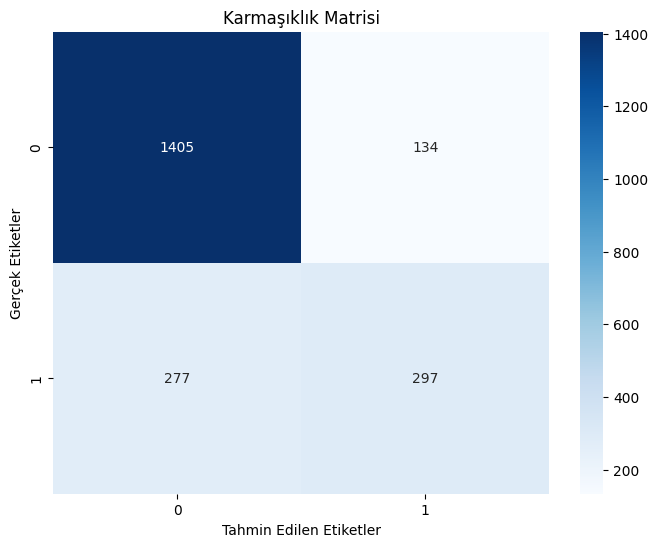

In [41]:
def plot_conf_matrix(y_test,y_pred):
    conf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Tahmin Edilen Etiketler")
    plt.ylabel("Gerçek Etiketler")
    plt.title("Karmaşıklık Matrisi")
    plt.show()
plot_conf_matrix(y_test,y_pred_log_final)

In [42]:
# KNN-HİPERPARAMETRE
knn_params = {"n_neighbors": range(2, 50)}

In [43]:
#En yi parametrenin seçilmesi

knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,  # işlemciyi maximum performansta kullanmak için
                           verbose=1).fit(X_train, y_train)  ## verbose rapor yazdırması için kullanılır.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [44]:
knn_gs_best.best_params_

{'n_neighbors': 38}

In [45]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X_train, y_train)

In [46]:
cv_results_final_knn = cross_validate(knn_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results_final_knn

{'fit_time': array([0.00533366, 0.00457072, 0.0049901 , 0.00490713, 0.00504708]),
 'score_time': array([0.22460127, 0.10636854, 0.10358691, 0.10355711, 0.10350776]),
 'test_accuracy': array([0.80020284, 0.80223124, 0.79614604, 0.77789047, 0.78498986]),
 'test_f1': array([0.6129666 , 0.61077844, 0.59393939, 0.56804734, 0.5708502 ]),
 'test_roc_auc': array([0.83810073, 0.82429246, 0.82803928, 0.81736177, 0.82150425])}

In [47]:
print(cv_results_final_knn["test_accuracy"].mean())
print(cv_results_final_knn["test_f1"].mean())
print(cv_results_final_knn["test_roc_auc"].mean())

0.7922920892494929
0.591316395587841
0.8258596973865201


In [48]:
y_pred_knn_final=knn_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn_final)
accuracy

0.795551348793185

In [49]:
print(classification_report(y_test, y_pred_knn_final))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1539
           1       0.64      0.56      0.60       574

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



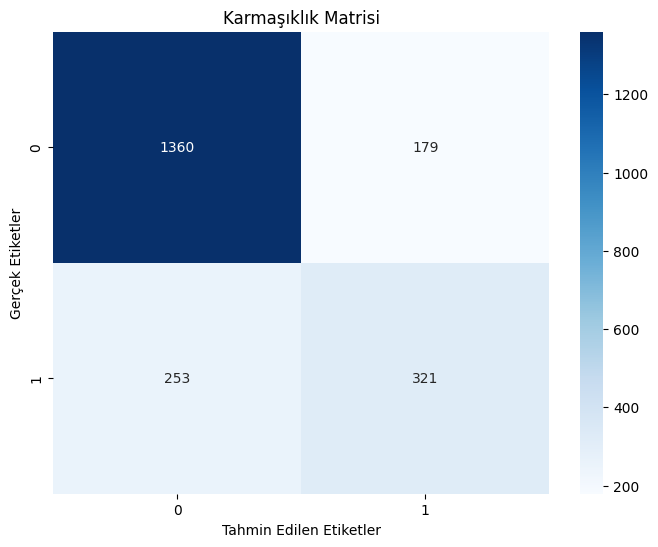

In [50]:
plot_conf_matrix(y_test,y_pred_knn_final)

In [51]:
from sklearn.metrics import RocCurveDisplay
#Roc-> Farklı eşik değerlerinde pozitif sınıfı tahmin etme başarısını gösterir.

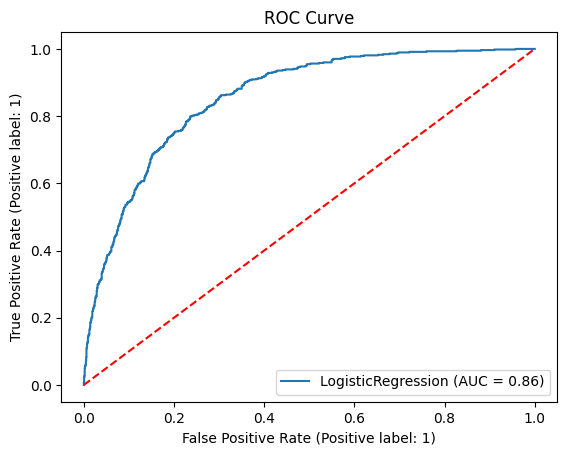

In [52]:
RocCurveDisplay.from_estimator(log_final, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0,1],[0,1],"r--")
plt.show()

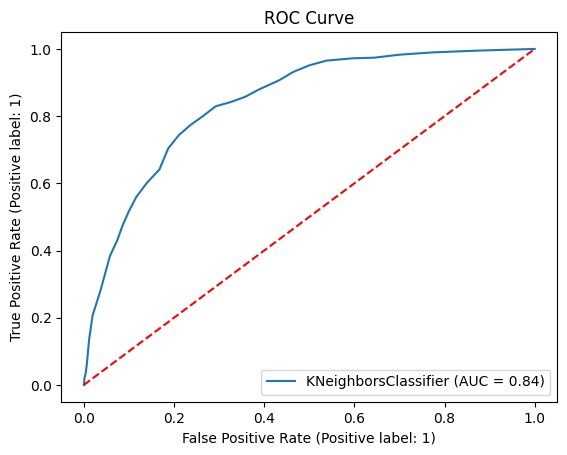

In [53]:
RocCurveDisplay.from_estimator(knn_final, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0,1],[0,1],"r--")
plt.show()